<a href="https://colab.research.google.com/github/opaulovitor/data_science/blob/main/An%C3%A1lise_dos_Dados_do_Airbnb_Buenos_Aires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img alt="Colaboratory Logo" width="30%" src="https://raw.githubusercontent.com/opaulovitor/data_science/main/logo_opaulovitords.png"></center>

---

# Análise dos Dados do Airbnb - Buenos Aires

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel!**

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás , já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="15%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Buenos Aires, e ver quais *insights* podem ser extraídos a partir de dados brutos.**

## Obtenção dos dados

Todos os dados utilizados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicia, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Buenos Aires (good for visualisations).*

In [7]:
# Importar os pacotes necessários

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
# Importar o arquivo 'listings.csv' para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2021-02-23/visualisations/listings.csv")

## Análise dos dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - Número de id gerado para identificar o imóvel
* `name` - Nome da propriedade anunciada
* `host_id` - Número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Esta coluna não contém nenhum valor válido
* `neighbourhood` - Nome do bairro
* `latitude` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da longitude da propriedade
* `room_type` - Informa o tipo de quarto que é oferecido
* `price` - Preço para alugar o imóvel
* `minimum_nights` - Quantidade mínima de noites para reservar
* `number_of_reviews` - Número de reviews que a propriedade possui
* `last_review` - Data do último review
* `reviews_per_month` - Quantidade de reviews por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.


In [9]:
# Mostrar as 5 primeiras entradas

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6283,Casa Al Sur,13310,Pamela,NaN,Balvanera,-34.60367,-58.40875,Entire home/apt,4473,3,1,2011-01-31,0.01,1,365
1,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,5368,2,26,2019-11-28,0.25,1,327
2,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59761,-58.39468,Private room,2415,1,20,2017-12-11,0.15,1,365
3,13095,Standard Room at Palermo Viejo B&B w pvt Bath,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2684,1,1,2018-12-18,0.04,7,365
4,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2684,1,0,NaN,NaN,7,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que o conjunto de dados possui e verificar os tipos de cada coluna.

Este *dataset* que estamos verificando é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivos `listings.csv` há uma versão mais completa com 20243 entradas e 74 variáveis (`listings.csv.gz`)

In [21]:
# Identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# Verificar os tipos de dados de cada coluna
display(df.dtypes)

Entradas:	 20243
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no ínicio se esses valores nulos são significativos comparados ao total de entradas.

* É possível verificar que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
* As variáveis `reviews_per_month* e `last_review` possuem valores nulos em aproximadamente 30% das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,03% dos valores nulos.

In [23]:
# Ordenar em ordem descrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.306822
last_review                       0.306822
host_name                         0.000346
name                              0.000247
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição das variáveis, irei plotar o histograma.

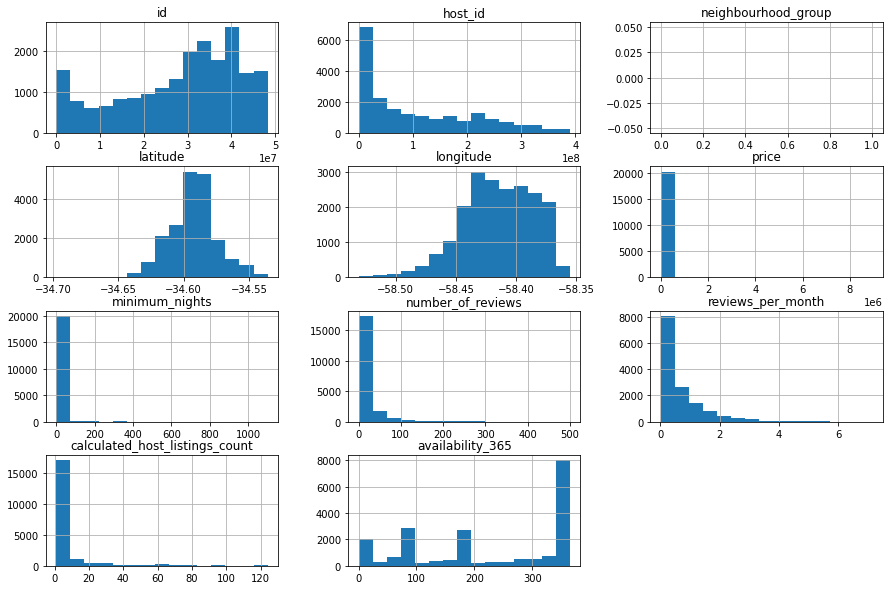

In [24]:
# Plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outlier*. São elas:

* Resumo estatístico por meio do método `describe()`.
* Plotar gráficos do tipo `boxplots` para a variável.

In [29]:
# Verificar o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.024300e+04,20243.000000,20243.000000,14032.000000,20243.000000,20243.000000
mean,5.172270e+03,6.586870,16.280097,0.671542,7.382651,226.623771
std,6.713130e+04,20.817938,33.464033,0.803501,16.704003,133.867058
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.612000e+03,2.000000,0.000000,0.130000,1.000000,89.000000
50%,2.507000e+03,3.000000,3.000000,0.370000,2.000000,242.000000
75%,4.030000e+03,5.000000,17.000000,0.920000,4.000000,364.000000
max,8.946021e+06,1100.000000,500.000000,7.140000,124.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 4030, porém seu valor máximo é de 8946021.
* A quantidade mínima de noites (variável `minimum_nights`) está acima de 365 dias no ano (consta como 1100).

#### Boxplot para a variável `minimum_nights`

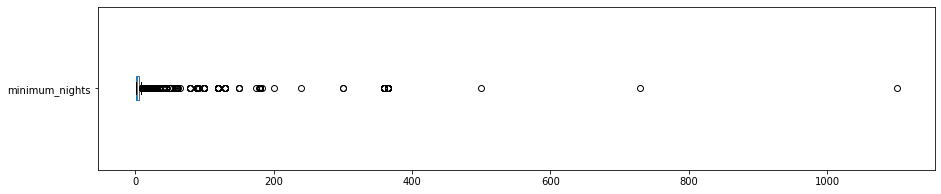

minimum_nights: valores acima de 30 dias:
354 entradas
1.7488%


In [30]:
# Plotar o Boxplot para a variável 'minimum_nights'
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Verificar a quantidade de valores acima de 30 dias para a variável 'minimum_nights'
print("minimum_nights: valores acima de 30 dias:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para a variável `price`

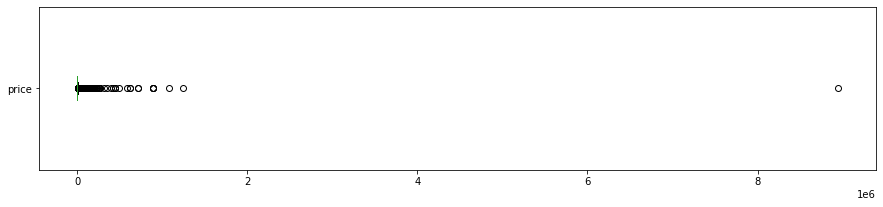

price: valores acima de 7500:
1942 entradas
9.5934%


In [37]:
# Plotar o Boxplot para a variável 'price'
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Verificar a quantidade de valores acima de 7500 para a variável 'price'
print("price: valores acima de 7500:")
print("{} entradas".format(len(df[df.price > 7500])))
print("{:.4f}%".format((len(df[df.price > 7500]) / df.shape[0])*100))

### Histogramas sem *outliers*

Já que identificamos os *outliers* nas variáveis `minimum_nights` e `price`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

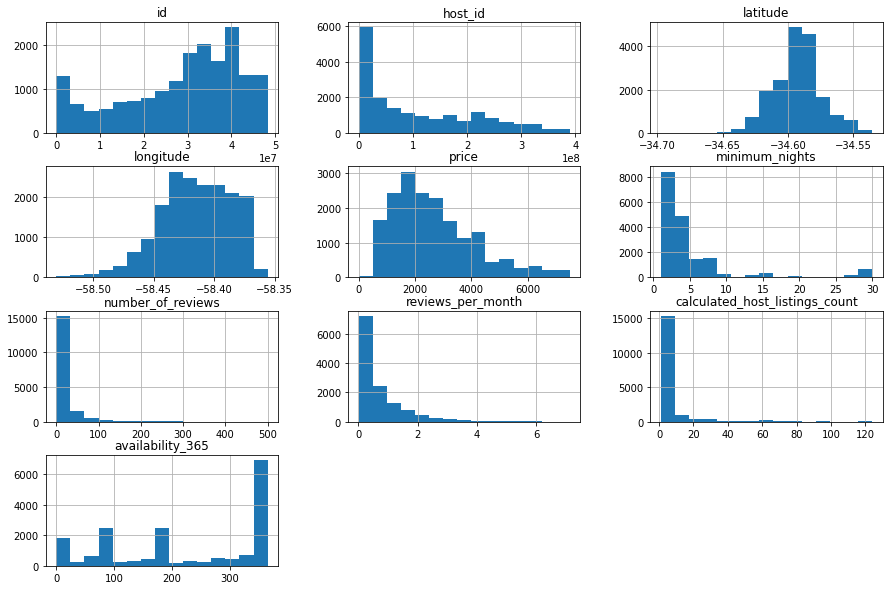

In [39]:
# Remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price > 7500].index, axis=0, inplace=True)

# Remover a variável `neighbourhood_group`, pois está vazia
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### *Q4. Qual a correlação existente entre as variáveis?*

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [40]:
# Criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.038442,-0.017416,-0.058297,0.159284,0.082544
minimum_nights,-0.038442,1.000000,-0.074676,-0.117716,0.083169,0.017092
number_of_reviews,-0.017416,-0.074676,1.000000,0.771969,-0.057843,-0.012863
reviews_per_month,-0.058297,-0.117716,0.771969,1.000000,-0.028952,-0.077844
calculated_host_listings_count,0.159284,0.083169,-0.057843,-0.028952,1.000000,0.037579
availability_365,0.082544,0.017092,-0.012863,-0.077844,0.037579,1.000000


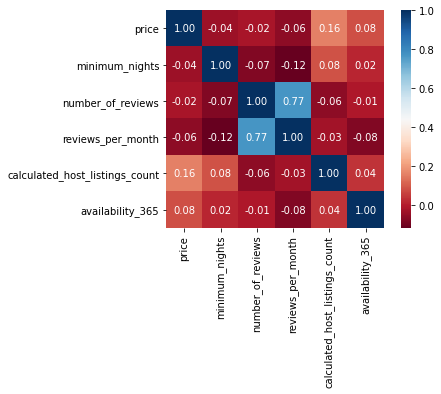

In [41]:
sns.heatmap(corr, cmap="RdBu", fmt='.2f', square=True, linecolor='white', annot=True);

### *Q5. Qual o tipo de imóvel mais alugado no Airbnb?*
A variável `room_type` indica o tipo de locação que está anunciada no Airbnb. No Airbnb é possível:
* Alugar apartamentos/casas inteiras;
* Alugar apenas um quarto;
* Dividir o quarto com outras pessoas;
* Alugar um quarto de hotel.

Vamos contar a quantidade de ocorrências de cada tipo de alguel, usando o método `value_counts()`.

In [42]:
# Mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    13939
Private room        3487
Shared room          413
Hotel room           145
Name: room_type, dtype: int64

In [43]:
# Mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.775078
Private room       0.193895
Shared room        0.022965
Hotel room         0.008063
Name: room_type, dtype: float64

### *Q6. Qual a localidade mais cara de Buenos Aires?*

Uma maneira de se verificar uma variável em função de outra é usando o método `groupby()`. No caso, queremos comparar os bairros (variável `neighbourhood`) a partir do preço (variável `price`) de locação.

In [44]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Villa Soldati    5299.000000
Puerto Madero    4687.432432
Palermo          3012.122911
Floresta         3004.160000
Retiro           2850.323253
Recoleta         2845.044974
Belgrano         2747.916230
Nuñez            2745.880117
Liniers          2604.466667
San Telmo        2558.904014
Name: price, dtype: float64

Acima, vemos que o bairro Villa Soldati, está com média de preço superior a de lugares como Puerto Madero, Palermo e Floresta.

Uma pessoa que não conhecesse Buenos Aires poderia apresentar esses resultados sem se questionar. Só para exemplificar como uma amostra pode ser não-representativa, veja quantas entradas há para Villa Soldati.

In [46]:
# Verificar a quantidade de imóveis no bairro de Villa Soldati
print(df_clean[df_clean.neighbourhood == "Villa Soldati"].shape)

(3, 15)


In [47]:
# Verificar os 3 imóveis no bairro de Villa Soldati
df_clean[df_clean.neighbourhood == "Villa Soldati"]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
10896,32548725,Departamento amplio y cómodo,226116702,Aneth,Villa Soldati,-34.66103,-58.43603,Entire home/apt,5373,1,0,NaN,NaN,2,179
12203,34492123,Muy buen hambiente..tranquilidad y espacio,260348454,Nilsa,Villa Soldati,-34.65719,-58.44228,Private room,4000,1,0,NaN,NaN,1,364
12443,34811527,Departamento capital federal 4 ambientes grandes,262448759,Fer,Villa Soldati,-34.66628,-58.44494,Private room,6524,1,0,NaN,NaN,1,365


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

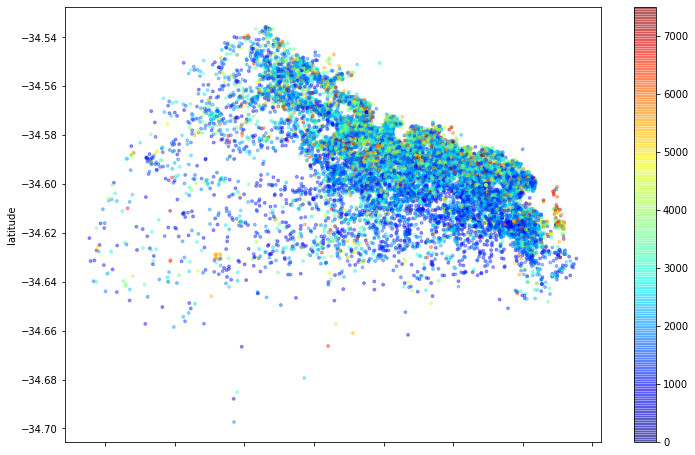

In [48]:
# Plotar os imóveis pela Latitude e Longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### *Conclusões*

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com os 74 atributos disponíveis.